<h2>The dataset for locating and classifying images is the following</h2>
<a href="https://osm-boundaries.com">administrative shapefiles: https://osm-boundaries.com</a> => denmark-adm7.geojson <br/>
<a href="https://batch.openaddresses.io/">addresses: https://batch.openaddresses.io/</a> => denmark-addresses.geojson <br/>
<p>After downloading shapefiles, if they are in separate files, combine them.</p>

In [11]:
!python -m pip install turfpy geojson ndjson matplotlib pandas

<p>Now we will load in all shapes and points</p>

In [2]:
import ndjson
import geojson
with open("./data/denmark-addresses.geojson") as f:
    addresses = geojson.FeatureCollection(ndjson.load(f))
addresses["features"][0]

{'type': 'Feature',
 'properties': {'hash': '0f3454edb3ac7a1d',
  'number': '26',
  'street': 'Skolebakken',
  'unit': '',
  'city': 'Grenaa',
  'district': '',
  'region': 'Region Midtjylland',
  'postcode': '8500',
  'id': ''},
 'geometry': {'type': 'Point', 'coordinates': [10.9036344, 56.4149512]}}

In [3]:
with open("./data/denmark-adm7.geojson") as f:
    administrative = geojson.load(f)
administrative["features"][0]

{"geometry": {"coordinates": [[[[10.520192, 55.973105], [10.535739, 55.936735], [10.576125, 55.931714], [10.60064, 55.906407], [10.583214, 55.868533], [10.530007, 55.851764], [10.527229, 55.795395], [10.550752, 55.769286], [10.621105, 55.764659], [10.648487, 55.80793], [10.64123, 55.837169], [10.679231, 55.870833], [10.677298, 55.880248], [10.688761, 55.894317], [10.688426, 55.903941], [10.67483, 55.924849], [10.687879, 55.894025], [10.66203, 55.878645], [10.633199, 55.877824], [10.609962, 55.90765], [10.652637, 55.916494], [10.581459, 55.946974], [10.562507, 56.002626], [10.520192, 55.973105]]], [[[10.615374, 55.906508], [10.617833, 55.905325], [10.619537, 55.907438], [10.616313, 55.908207], [10.615374, 55.906508]]], [[[10.61605, 55.902743], [10.618893, 55.900427], [10.623756, 55.902789], [10.619349, 55.904152], [10.61605, 55.902743]]], [[[10.628855, 55.897303], [10.634722, 55.890046], [10.646925, 55.889959], [10.631092, 55.899392], [10.628855, 55.897303]]], [[[10.630631, 55.907589], 

<p>We could print out the different municipalities and compare it to cities according to the data</p>

In [4]:
cities = list(set(map(lambda x: x['properties']["city"], addresses["features"])))
cities.sort()
print(cities)
municipalities = list(set(map(lambda x: x['properties']["name"], administrative["features"])))
municipalities.sort()
print(municipalities)

['Aabenraa', 'Aabybro', 'Aakirkeby', 'Aalborg', 'Aalborg SV', 'Aalborg SØ', 'Aalborg Øst', 'Aalestrup', 'Aarhus C', 'Aarhus N', 'Aarhus V', 'Aars', 'Aarup', 'Agedrup', 'Agerbæk', 'Agerskov', 'Agersø', 'Albertslund', 'Allerød', 'Allinge', 'Allingåbro', 'Almind', 'Anholt', 'Ans By', 'Ansager', 'Arden', 'Asaa', 'Askeby', 'Askø', 'Asnæs', 'Asperup', 'Assens', 'Augustenborg', 'Aulum', 'Auning', 'Avernakø', 'Bagenkop', 'Bagsværd', 'Balle', 'Ballerup', 'Bandholm', 'Barrit', 'Barsø', 'Beder', 'Bedsted Thy', 'Bevtoft', 'Billum', 'Billund', 'Bindslev', 'Birkerød', 'Birkholm', 'Bjerringbro', 'Bjert', 'Bjæverskov', 'Bjørnø', 'Blokhus', 'Blommenslyst', 'Blåvand', 'Boeslunde', 'Bogense', 'Bogø By', 'Bolderslev', 'Bording', 'Borre', 'Borup', 'Brabrand', 'Bramming', 'Brande', 'Branderup J', 'Bredebro', 'Bredsten', 'Brenderup Fyn', 'Broager', 'Broby', 'Brovst', 'Bryrup', 'Brædstrup', 'Brøndby', 'Brøndby Strand', 'Brønderslev', 'Brønshøj', 'Brørup', 'Bylderup-Bov', 'Bække', 'Bækmarksbro', 'Bælum', 'Børk

In [5]:
import geodata

geodata.municipality(*addresses['features'][0]['geometry']['coordinates'])


'Norddjurs Kommune'

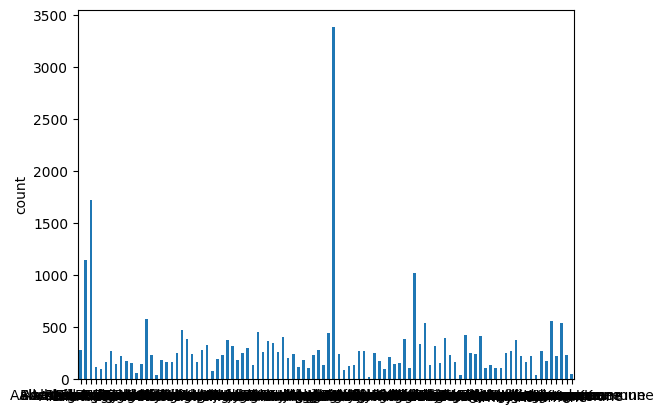

In [15]:
import random
municipalities = list(map(lambda x: geodata.municipality(*x['geometry']['coordinates']), random.sample(addresses["features"], 30000)))

import matplotlib.pyplot as plt
import pandas as pd

df = pd.Series(municipalities)


df.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()